<a href="https://colab.research.google.com/github/GarimaGarima/TensorFlow/blob/master/InBetweenConvolutionalLayers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import imageio as im
import tensorflow
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/shapes.zip", 'r')
zip_ref.extractall("/data")
zip_ref.close()

### **Circles**

In [0]:
images = []
for img_path in glob.glob('/data/shapes/training_set/circles/*.png'):
    images.append(mpimg.imread(img_path))

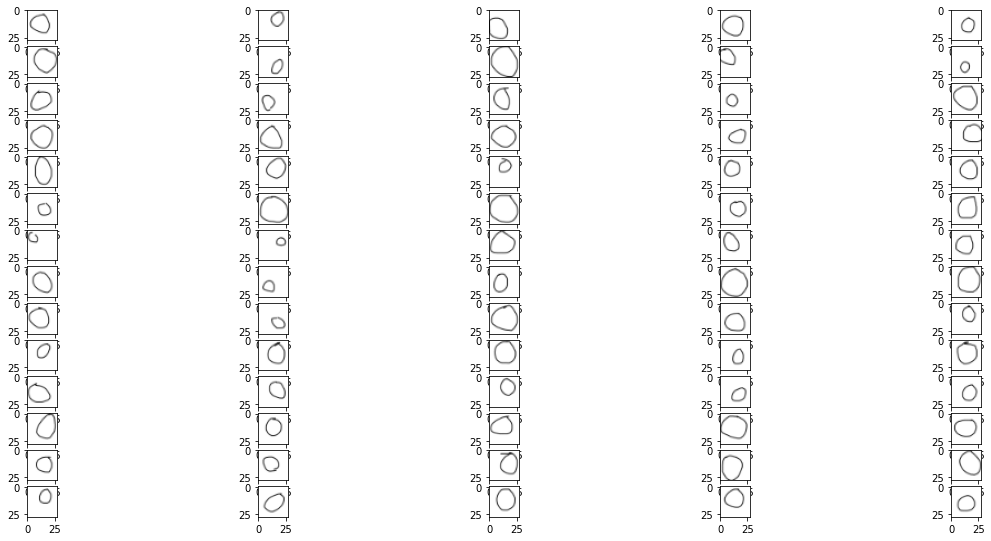

In [169]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

### **Squares**

In [0]:
images = []
for img_path in glob.glob('/data/shapes/training_set/squares/*.png'):
    images.append(mpimg.imread(img_path))

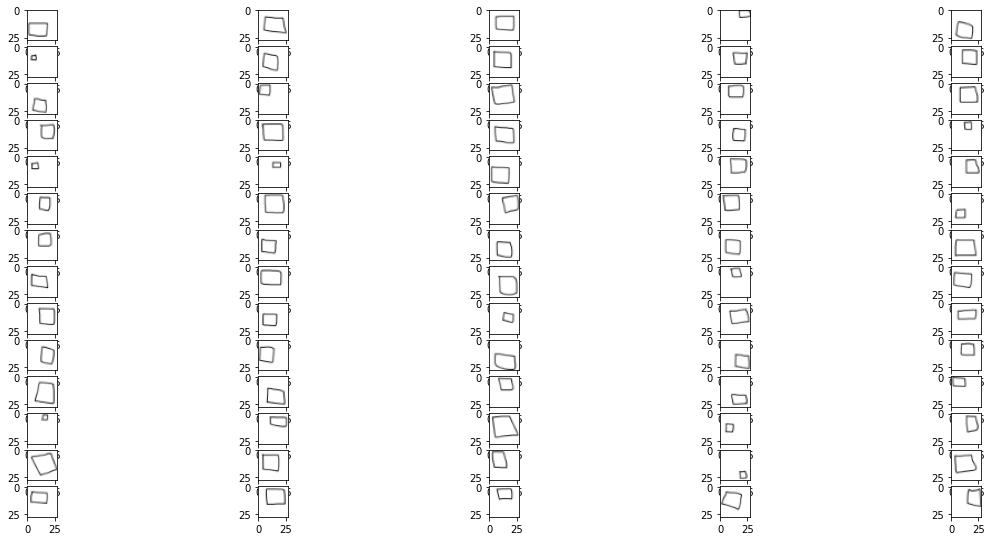

In [171]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

### **Triangles**

In [0]:
images = []
for img_path in glob.glob('/data/shapes/training_set/triangles/*.png'):
    images.append(mpimg.imread(img_path))

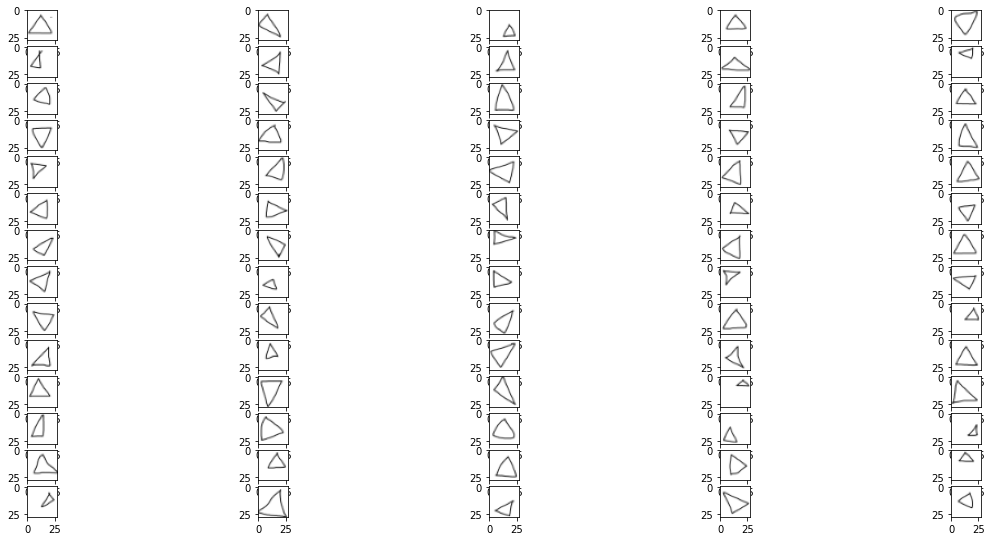

In [173]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [174]:
#shape of the image

img = im.imread('/data/shapes/training_set/circles/drawing(40).png')
img.shape

(28, 28, 3)

### **Create** **CNN**

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape = (28, 28, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units = 3, activation = 'softmax'))

In [176]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)         

In [0]:
model.compile(optimizer = 'rmsprop',
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

### **Read data from directories and augmentation**

In [0]:
# Using imageDataGenerator to read images from directories
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [179]:
# reading training set and augmenting it 
# training set is a directory iterator having tuples of x, y  
# x = numpy array containing a batch of images with shape (batch_size,  target_size, channels) and y is label
training_set = train_datagen.flow_from_directory('/data/shapes/training_set',
                                                 target_size = (28, 28),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 210 images belonging to 3 classes.


In [180]:
# reading test set data from folder 
test_set = test_datagen.flow_from_directory('/data/shapes/test_set',
                                            target_size = (28, 28),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 90 images belonging to 3 classes.


In [181]:
print(len(training_set))
print(len(training_set[0]))
print(training_set[0][1])
print(training_set[1][1])

14
2
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [182]:
# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath = "best_weights.hdf5",
                              save_best_only = True,
                              monitor = 'val_accuracy',
                              verbose=1)

history = model.fit_generator(training_set,
                    steps_per_epoch = 100,
                    epochs = 20,
                    callbacks=[cp_callback],
                    validation_data = test_set,
                    validation_steps = 50)

Epoch 1/20
 97/100 [============================>.] - ETA: 0s - loss: 1.1037 - accuracy: 0.3065
Epoch 00001: val_accuracy improved from -inf to 0.32713, saving model to best_weights.hdf5
100/100 [==============================] - 2s 16ms/step - loss: 1.1035 - accuracy: 0.3083 - val_loss: 1.0992 - val_accuracy: 0.3271
Epoch 2/20
 99/100 [============================>.] - ETA: 0s - loss: 1.1011 - accuracy: 0.3122
Epoch 00002: val_accuracy improved from 0.32713 to 0.34176, saving model to best_weights.hdf5
100/100 [==============================] - 2s 15ms/step - loss: 1.1011 - accuracy: 0.3123 - val_loss: 1.0986 - val_accuracy: 0.3418
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 1.0649 - accuracy: 0.3828
Epoch 00003: val_accuracy improved from 0.34176 to 0.75665, saving model to best_weights.hdf5
100/100 [==============================] - 2s 15ms/step - loss: 1.0649 - accuracy: 0.3828 - val_loss: 0.8866 - val_accuracy: 0.7566
Epoch 4/20
100/100 [=================

**storing the weights of the best model**

In [0]:
# loading the model with best weights
model.load_weights("best_weights.hdf5")

In [0]:
# save the model
model.save('shapes.h5')

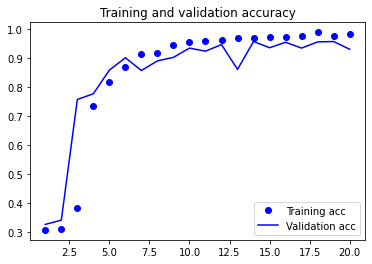

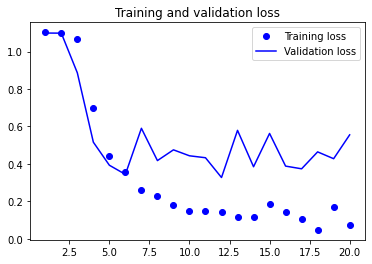

In [185]:
# accuracy and loss values during epochs in training

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



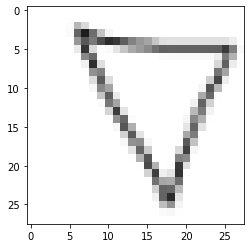

(1, 28, 28, 3)


In [186]:
img_path = "/data/shapes/test_set/triangles/drawing(71).png"

img = tensorflow.keras.preprocessing.image.load_img(img_path , target_size=(28,28))
img_tensor = tensorflow.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(img_tensor.shape)

In [187]:
x = tensorflow.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x,axis = 0)

images = np.vstack([x])
classes = model.predict_classes(images,batch_size=10)
print("Predicted class is:", classes)

Predicted class is: [2]


### **Visualizing Intermediate activations**

In [0]:
# Extracts the outputs of the top 12 layers
layer_outputs = [layer.output for layer in model.layers[:12]] 

# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 

In [0]:
activations = activation_model.predict(img_tensor)

In [190]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 28, 28, 32)


### **First Layer**

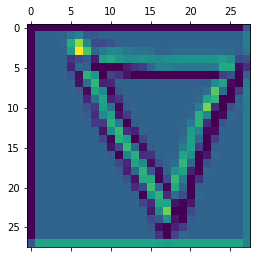

In [191]:
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

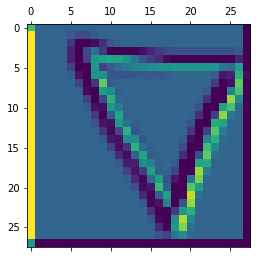

In [193]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

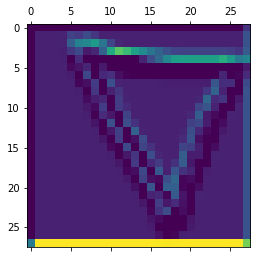

In [195]:
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')

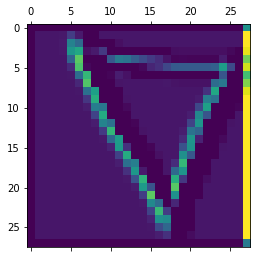

In [197]:
plt.matshow(first_layer_activation[0, :, :, 24], cmap='viridis')

### **Second Layer**

In [0]:
second_layer_activation = activations[1]


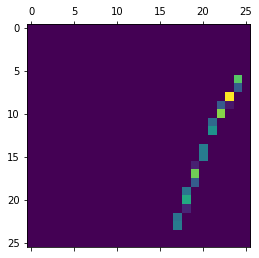

In [204]:
plt.matshow(second_layer_activation[0, :, :,2], cmap = 'viridis')

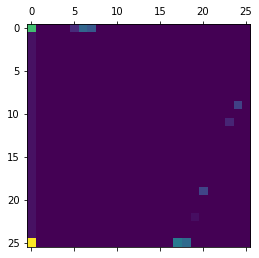

In [205]:
plt.matshow(second_layer_activation[0, :, :,9], cmap = 'viridis')

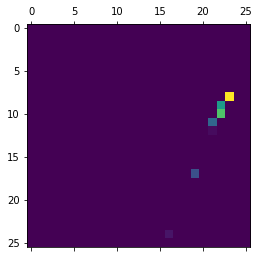

In [206]:
plt.matshow(second_layer_activation[0, :, :, 15], cmap = 'viridis')

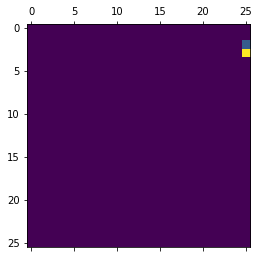

In [208]:
plt.matshow(second_layer_activation[0, :, :,20], cmap = 'viridis')

### **Third Layer**

In [0]:
third_layer_activation = activations[2]

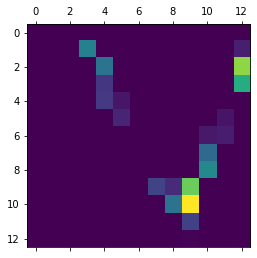

In [213]:
plt.matshow(third_layer_activation[0, :, :,8], cmap = 'viridis')

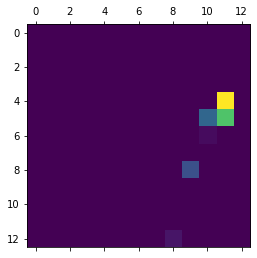

In [214]:
plt.matshow(third_layer_activation[0, :, :,15], cmap = 'viridis')

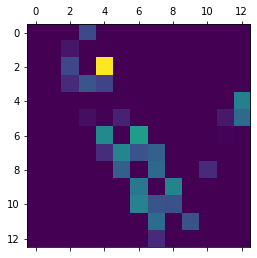

In [216]:
plt.matshow(third_layer_activation[0, :, :,24], cmap = 'viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


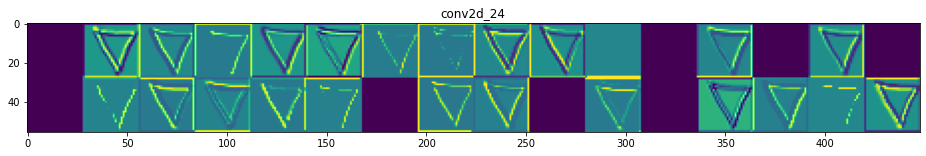

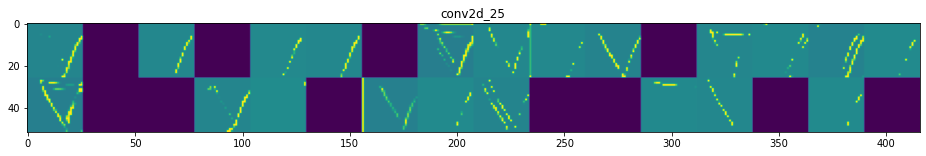

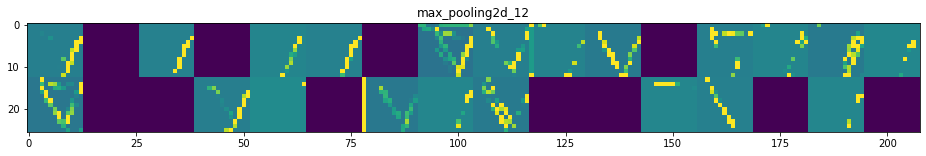

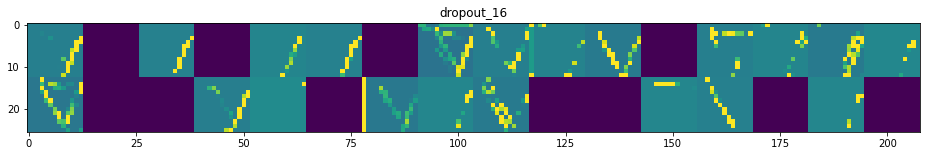

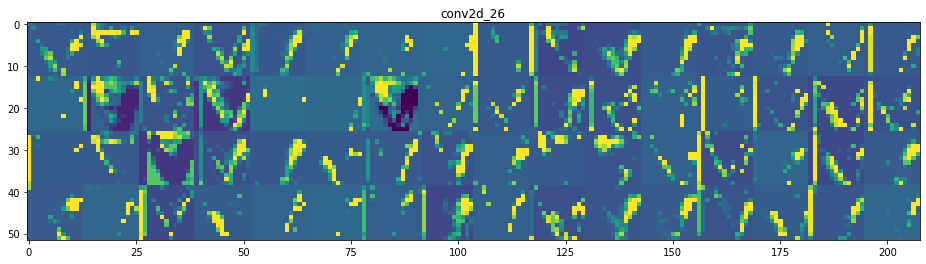

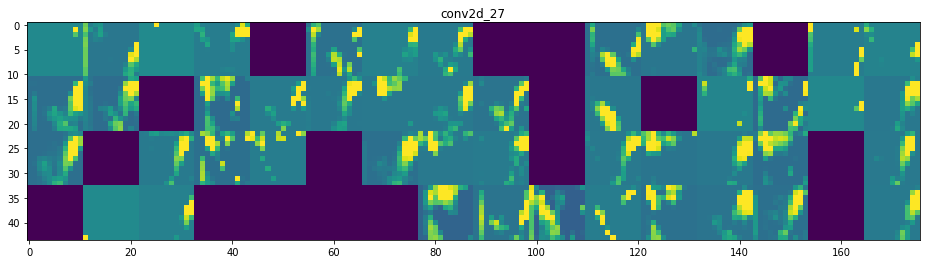

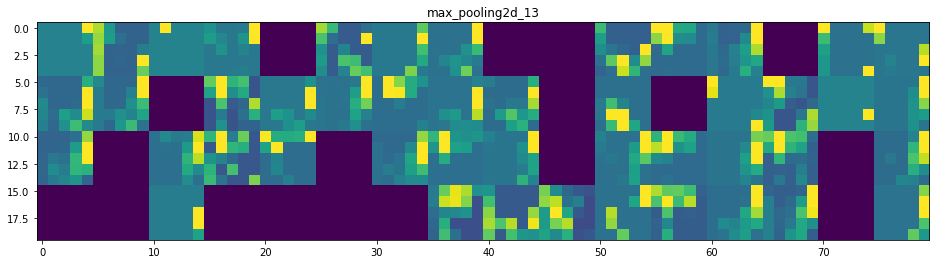

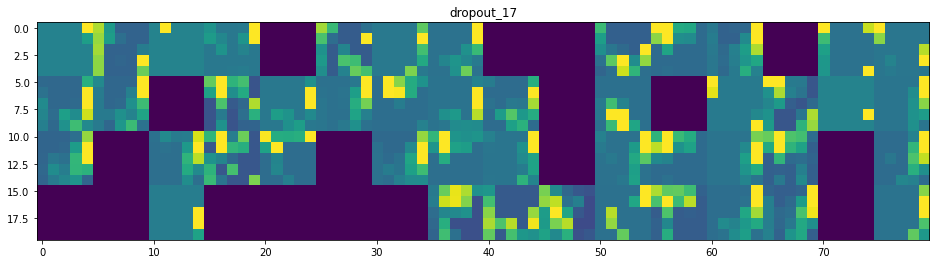

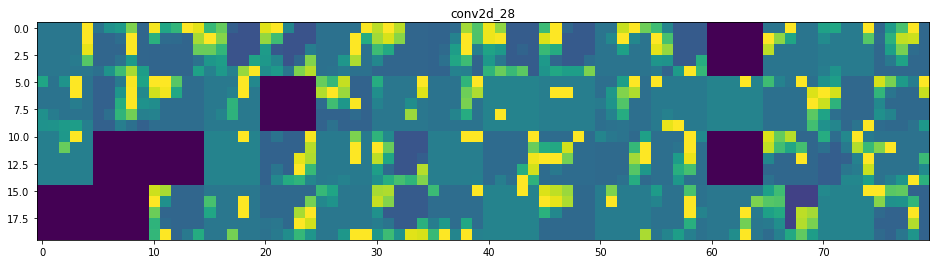

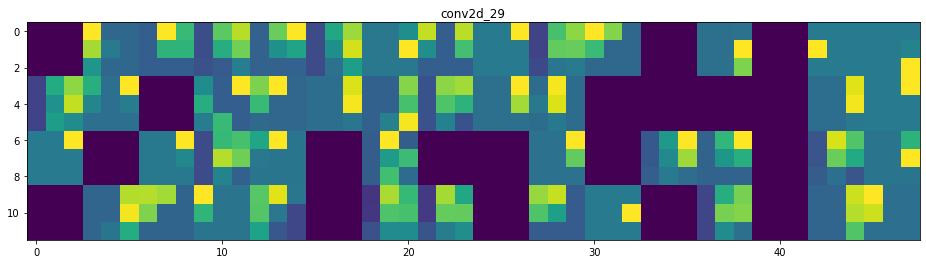

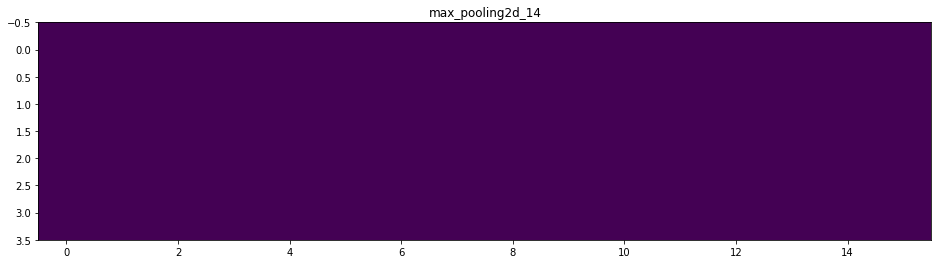

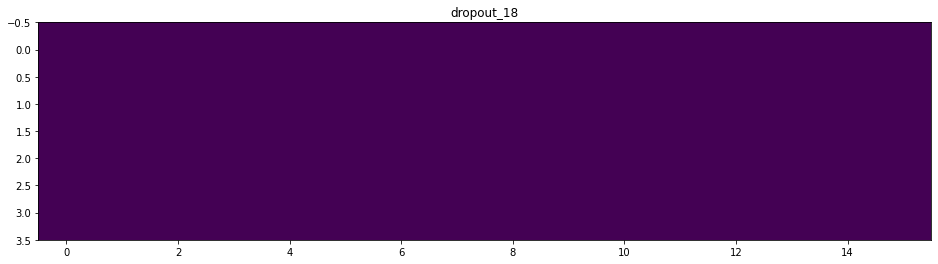

In [192]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) 

images_per_row = 16

# Displays the feature maps
for layer_name, layer_activation in zip(layer_names, activations): 
  # Number of features in the feature map
    n_features = layer_activation.shape[-1] 
  # The feature map has shape (1, size, size, n_features).
    size = layer_activation.shape[1] 
  # Tiles the activation channels in this matrix  
    n_cols = n_features // images_per_row 
    display_grid = np.zeros((size * n_cols, images_per_row * size))
  # Tiles each filter into a big horizontal grid
    for col in range(n_cols): 
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')